In [2]:
from plotnine import *
import pandas as pd

# Based on the summary of exp31 but manually adjusted the headers (they were hierarchical with bad naming)
stats_path = 'num_cold_starts_by_workload_edit.csv'
df = pd.read_csv(stats_path)
df.head()

,app,workload_label,num_cold,num_warm,cold_start_frequency
0,vprocessing_benchmark,steady.csv,1015,20889,4.859017
1,todo_api,spikes.csv,11,18430,0.059685
2,todo_api,jump.csv,8,21197,0.037741
3,todo_api,steady.csv,7,31010,0.022573
4,todo_api,bursty.csv,5,18895,0.026462


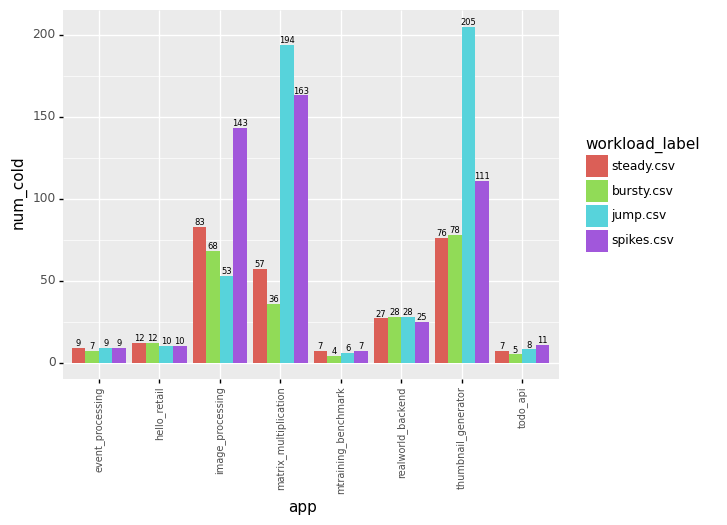

<ggplot: (299335897)>

In [15]:
df['workload_label'] = df['workload_label'].astype('category')
workload_order = [
    'steady.csv',
    'bursty.csv',
    'jump.csv',
    'spikes.csv'
]
df['workload_label'].cat.reorder_categories(workload_order, inplace=True)

no_video = df[df['app'] != 'vprocessing_benchmark']

(
    ggplot(no_video, aes(x='app', y='num_cold', fill='workload_label', label='num_cold'))
    + geom_col(stat='identity', position='dodge')
    + geom_text(position=position_dodge(width=0.9), va='bottom', size=6)
    + theme(
        axis_text_x=element_text(size=7, angle = 90)
    )
)